In [25]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import math
import pandas as pd

In [31]:
men_data.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm',
       'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom',
       'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

### Read .csv into dataframe

In [26]:
data = pd.read_csv('dados_voz_genero.csv', delimiter = ',')
data = data.drop("Unnamed: 0", axis=1)
names = list(data.keys())
data.sample(5)

sd    median       Q25       Q75       IQR      skew       kurt  \
1712  0.053585  0.256984  0.236169  0.268792  0.032623  3.203079  14.252101   
257   0.047604  0.239374  0.216721  0.250550  0.033830  3.324167  15.299873   
2107  0.033622  0.195240  0.179457  0.204008  0.024551  3.388562  16.699887   
2464  0.072364  0.172337  0.090622  0.216874  0.126252  2.577139  14.303568   
2154  0.028732  0.184286  0.174286  0.196735  0.022449  3.044452  12.738615   

        sp.ent       sfm      mode  centroid   meanfun    minfun    maxfun  \
1712  0.824963  0.201548  0.268392  0.240844  0.225755  0.062745  0.275862   
257   0.848937  0.126989  0.250097  0.221102  0.116978  0.025765  0.262295   
2107  0.824508  0.227180  0.196409  0.191174  0.184621  0.024502  0.275862   
2464  0.957703  0.675624  0.195574  0.157636  0.169987  0.049689  0.279070   
2154  0.817357  0.186539  0.185306  0.184780  0.165489  0.016244  0.262295   

       meandom    mindom    maxdom   dfrange   modindx  label  
1712  0.638849  0.007812  4.078125  4.070312  0.156384    0.0  
257   0.457868  0.242188  2.031250  1.789062  0.084481    1.0  
2107  0.458333  0.007812  6.546875  6.539062  0.087424    0.0  
2464  1.011489  0.023438  8.320312  8.296875  0.078331    0.0  
2154  0.829861  0.085938  6.539062  6.453125  0.207091    0.0

In [27]:
women_data = data.where(data["label"] == 0)
women_data = women_data.dropna()
women_data = women_data.reset_index()
women_data = women_data.drop("index", axis=1)

men_data = data.where(data["label"] == 1)
men_data = men_data.dropna()
men_data = men_data.reset_index()
men_data = men_data.drop("index", axis=1)

### Data histograms

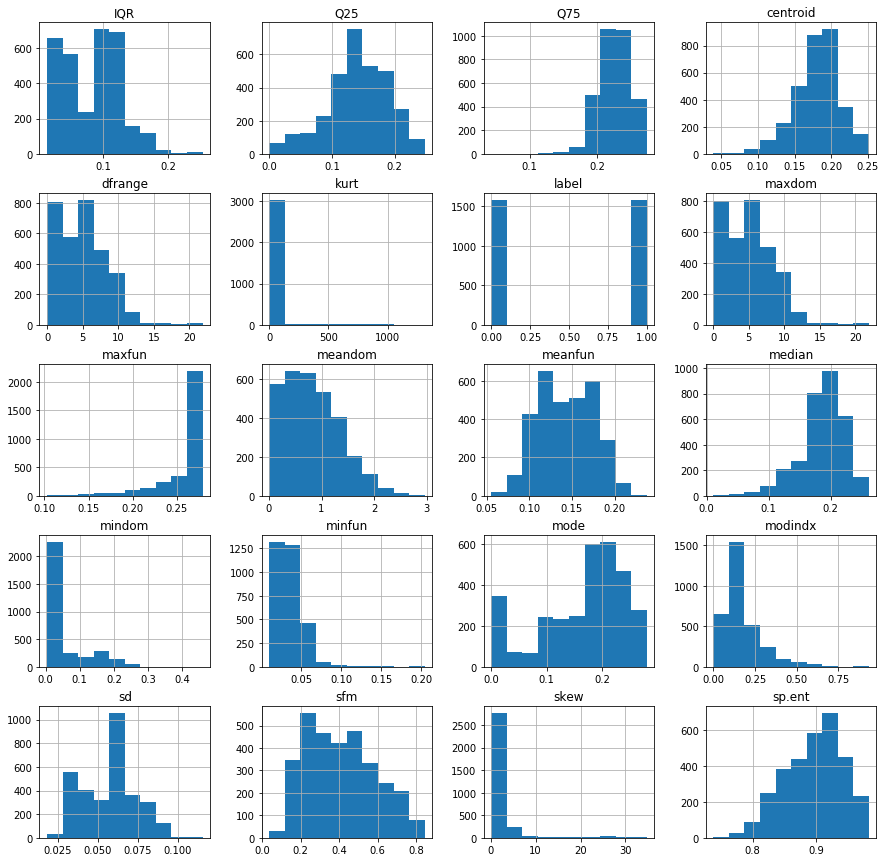

In [28]:
data.hist()
#women_data.hist()
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

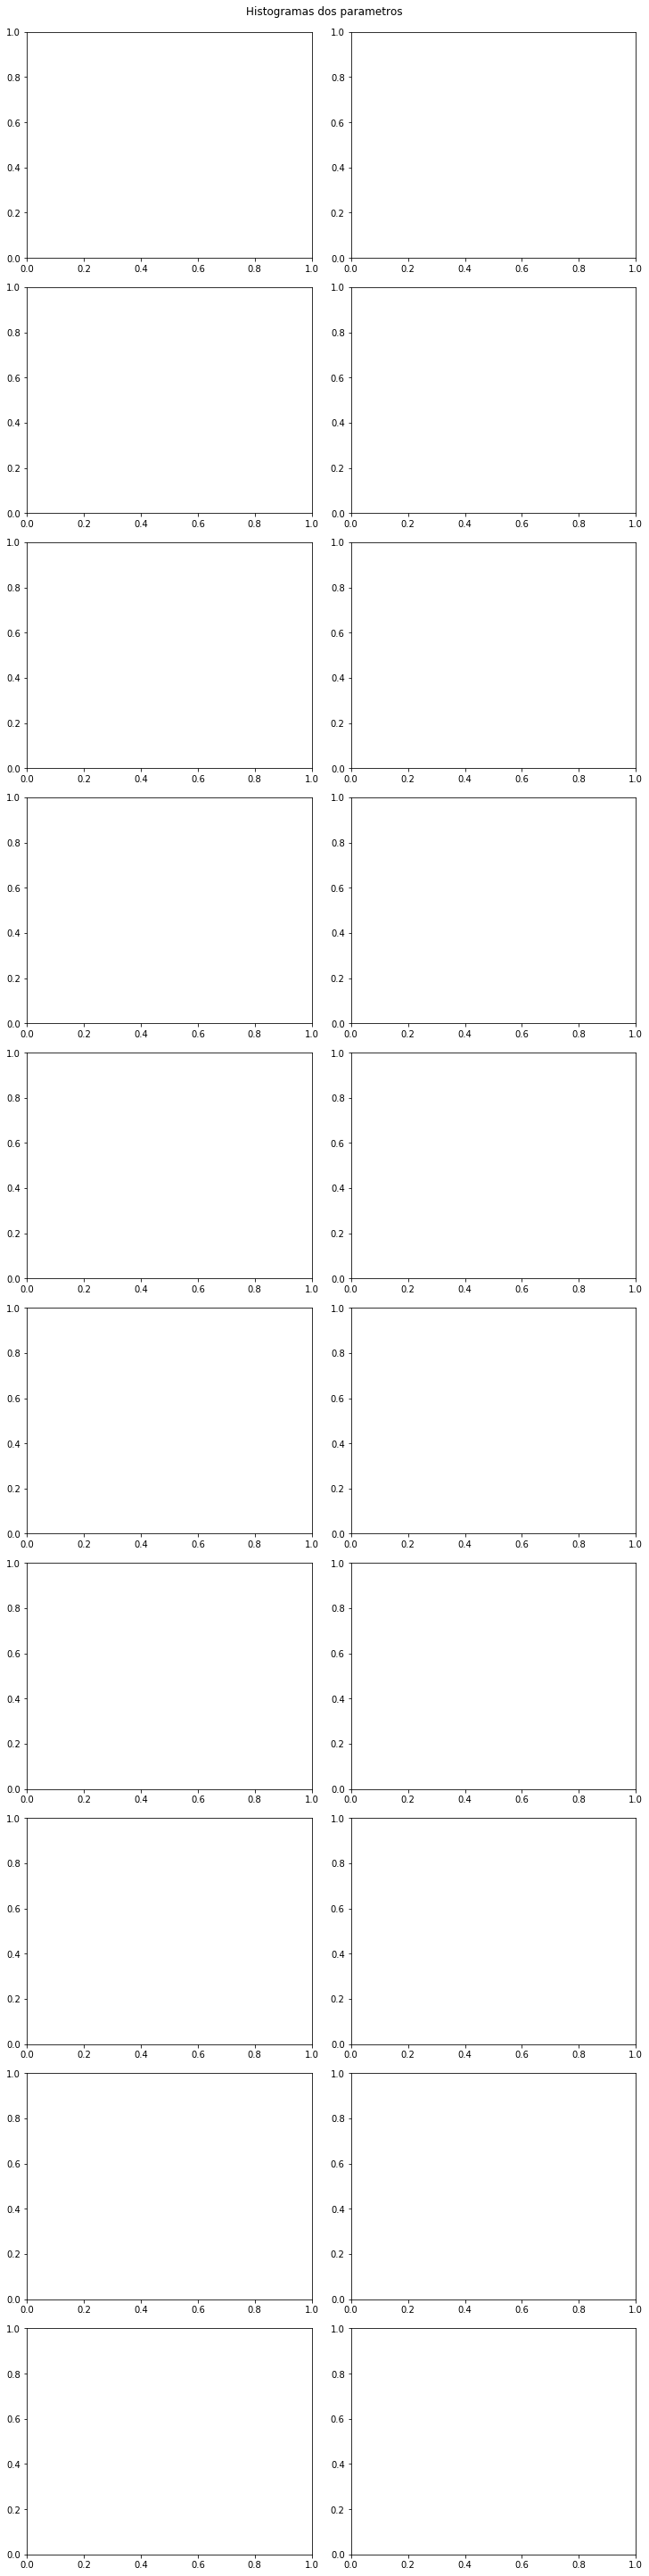

In [29]:
n = 20
fig, axs = plt.subplots(10,2,constrained_layout=True)
fig.set_figheight(40)
fig.set_figwidth(10)
fig.suptitle('Histogramas dos parametros')
# column =   men_data.columns[j],
  #  column = women_data.columns[j],
for j in range(n):
    axs[j].set_title(men_data.columns[j])
    axs[j].hist(x = men_data.iloc[:,j],  bins=50, alpha=0.5, color='red',label="Men")
    axs[j].hist(x = women_data.iloc[:,j], bins=50, alpha=0.5, color='blue',label="Women")
    axs[j].legend()
    
#fig.savefig('./class_histograms'+'.png')

### Density plots

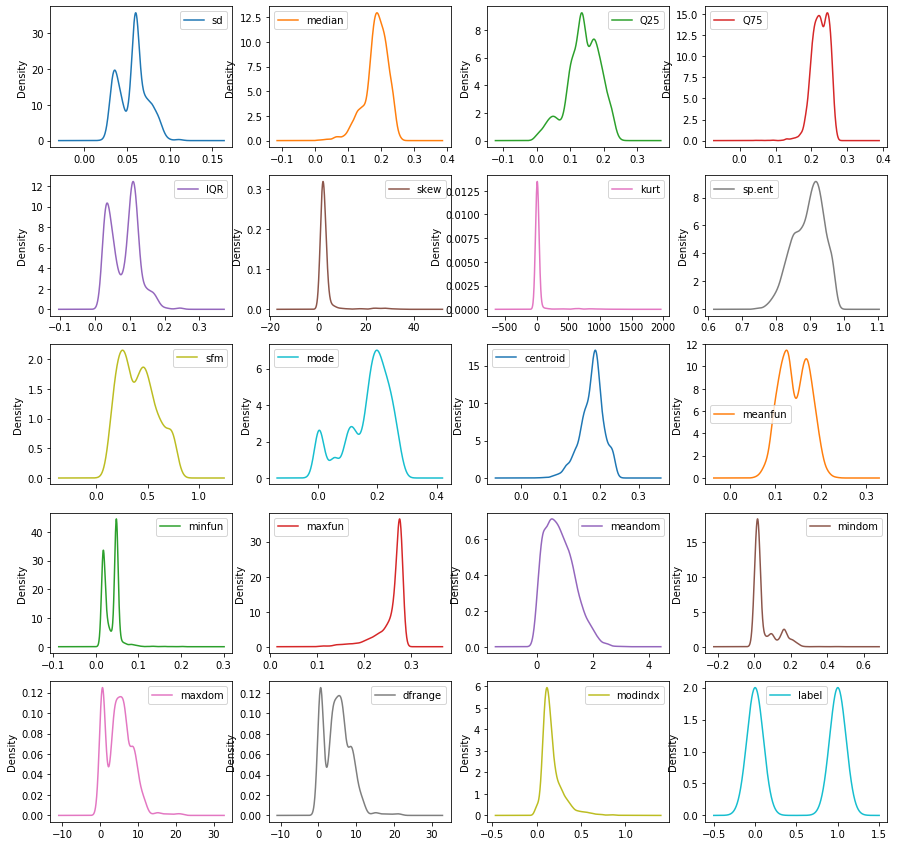

In [148]:
data.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

### Correlation matrix

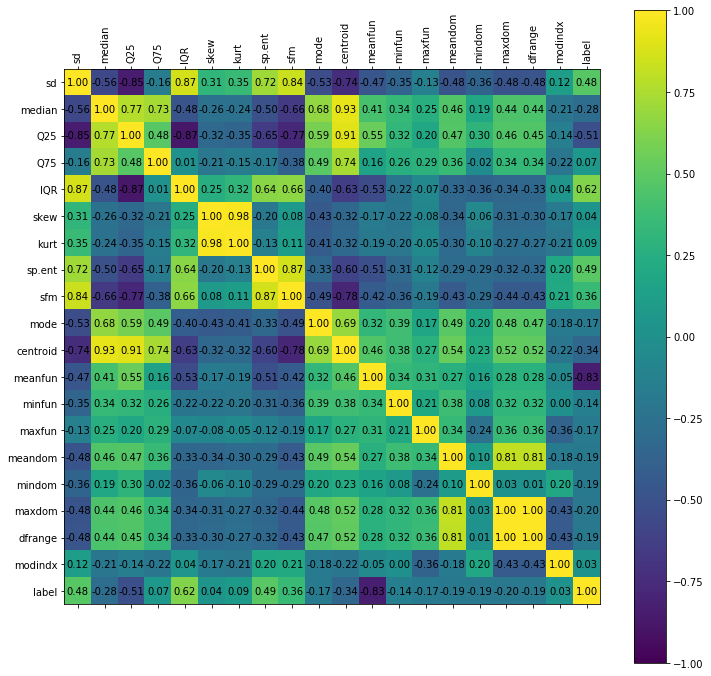

In [53]:
correlations = data.corr()

plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)

for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.show()

### Label x Infos (plotting only the ones with high abs. corr. with label) > 0.5

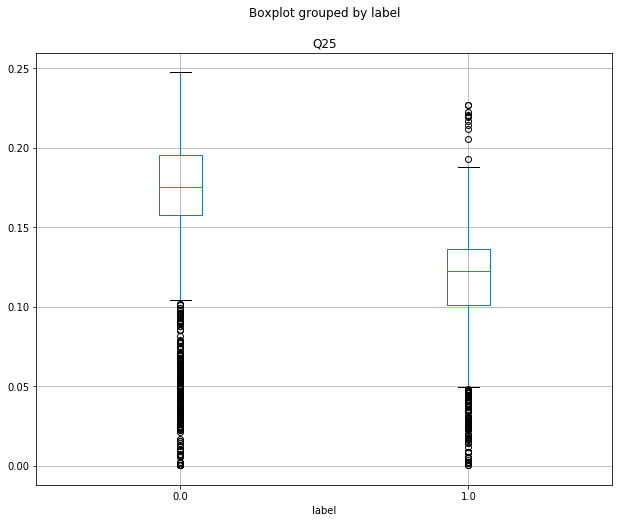

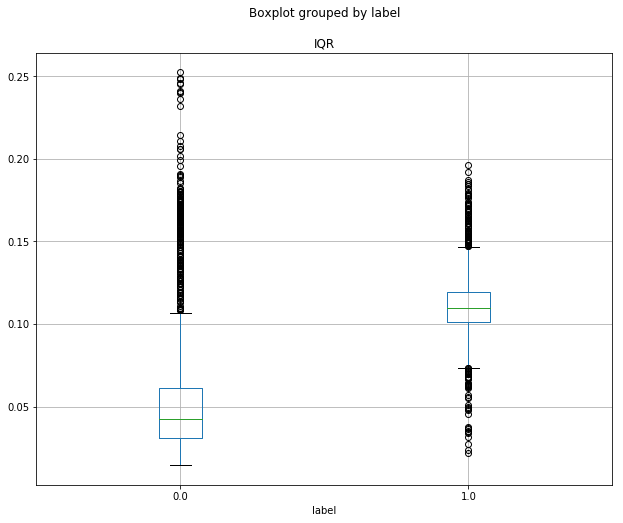

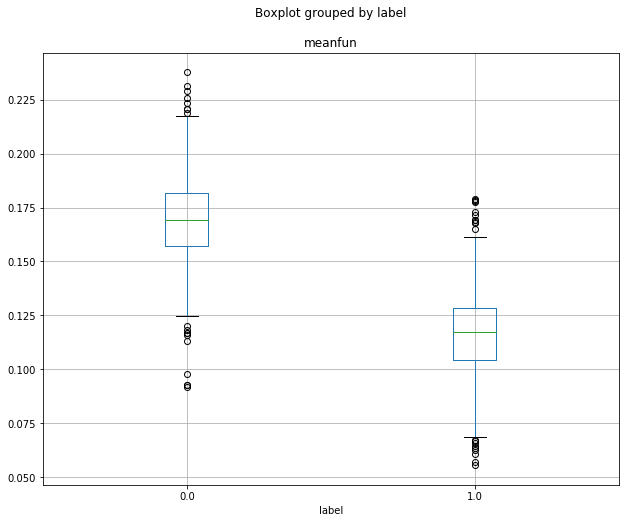

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(column=['Q25'], by='label', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(column=['IQR'], by='label', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(column=['meanfun'], by='label', ax=ax)
plt.show()

### Scatterplot

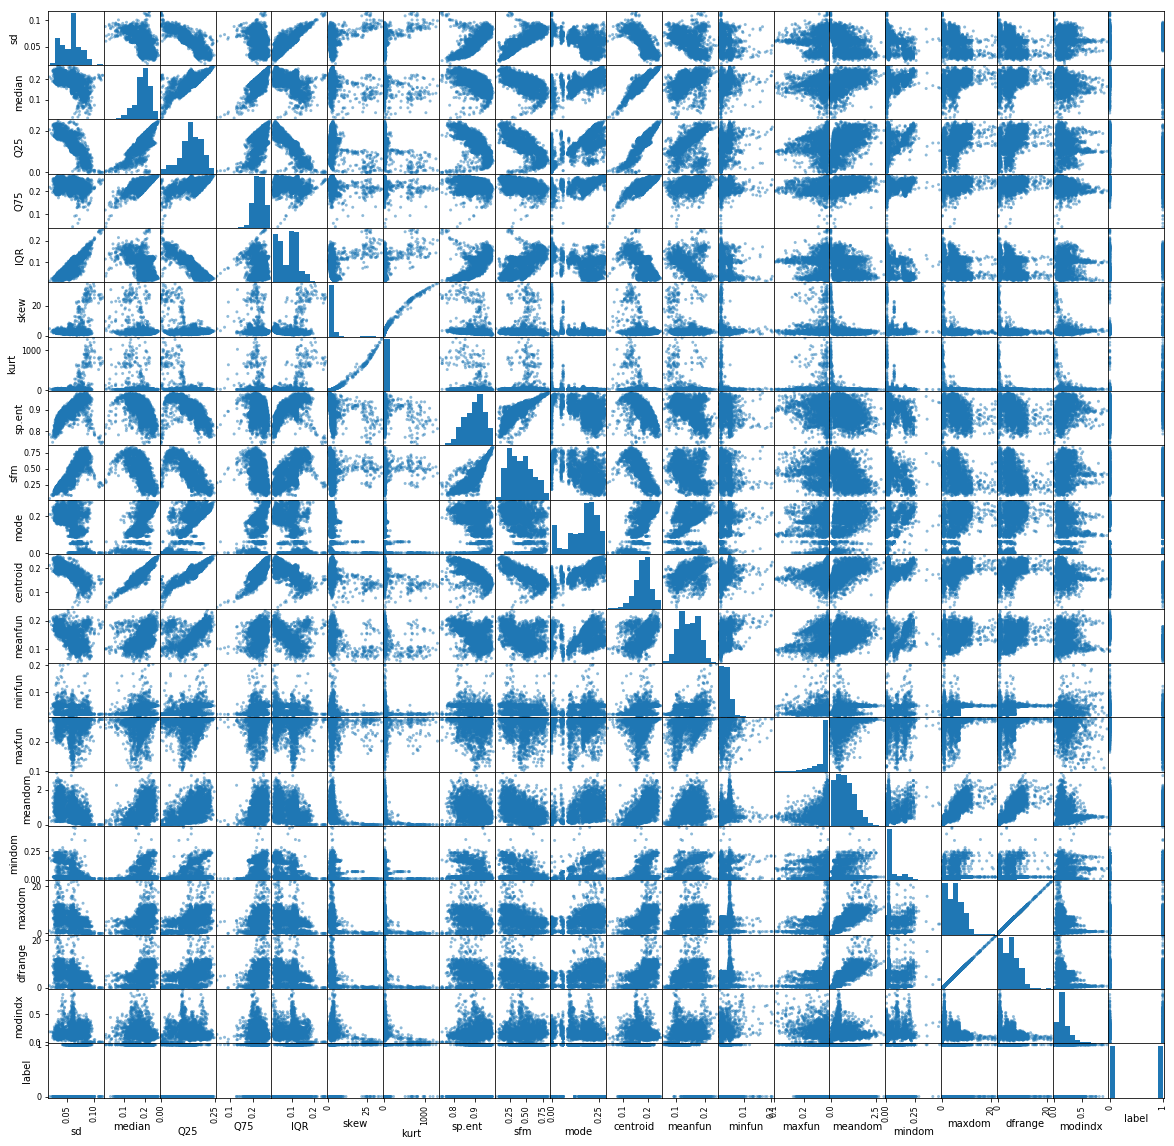

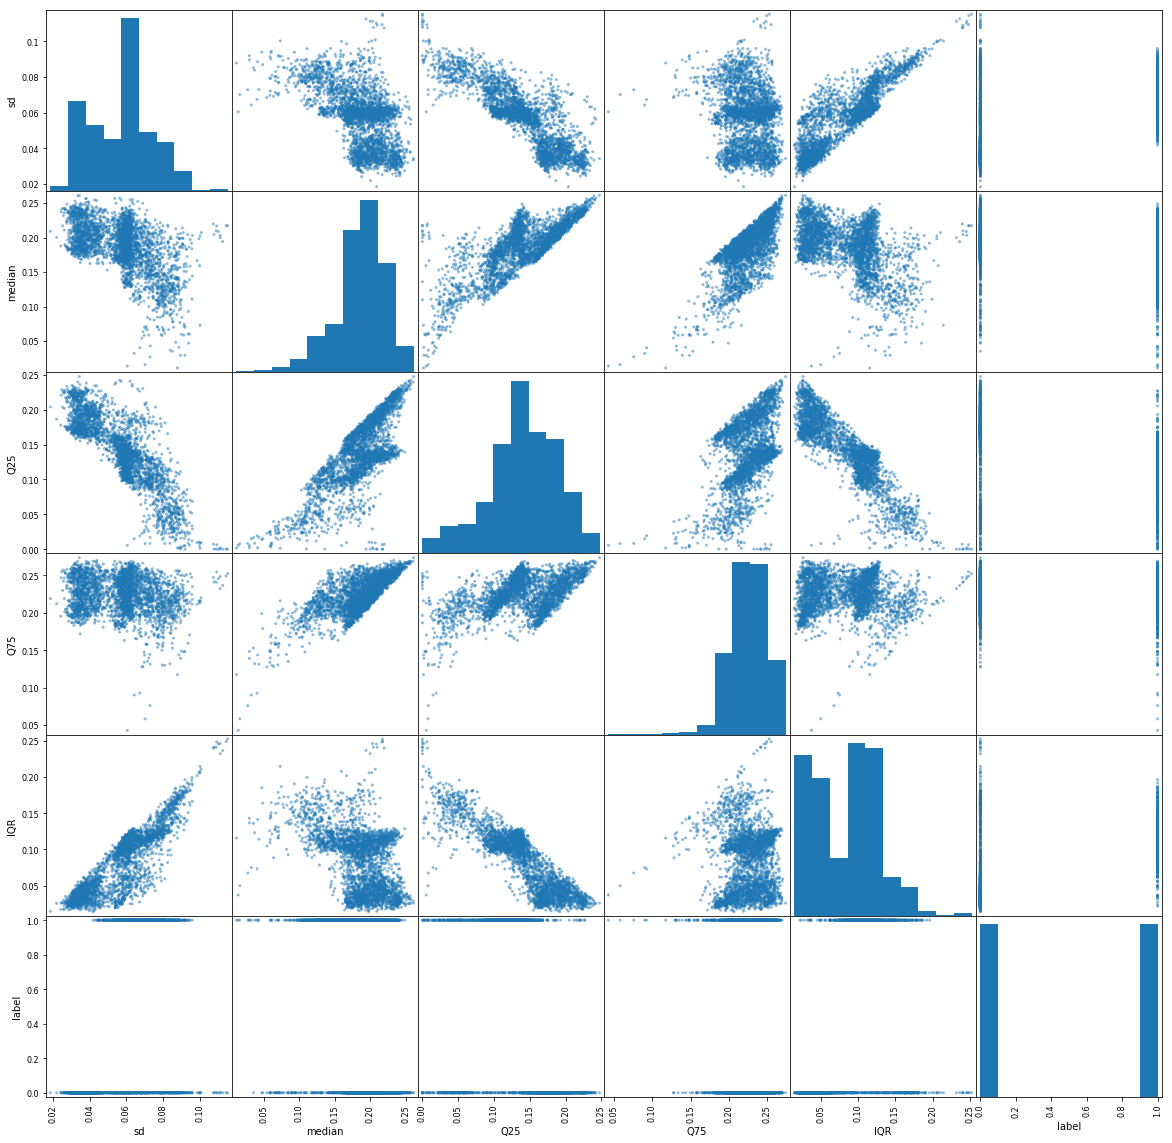

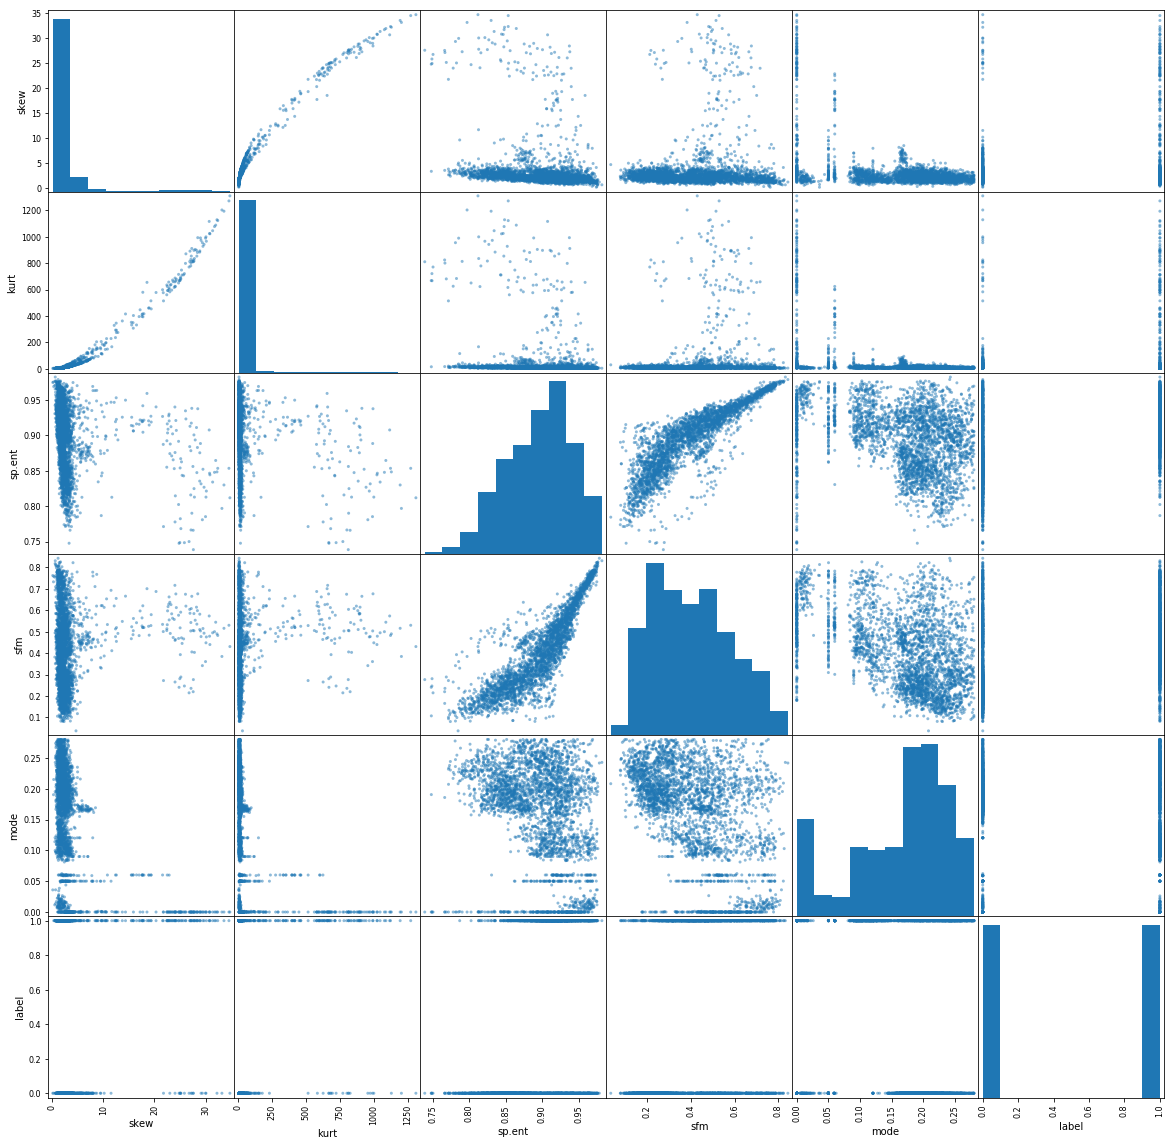

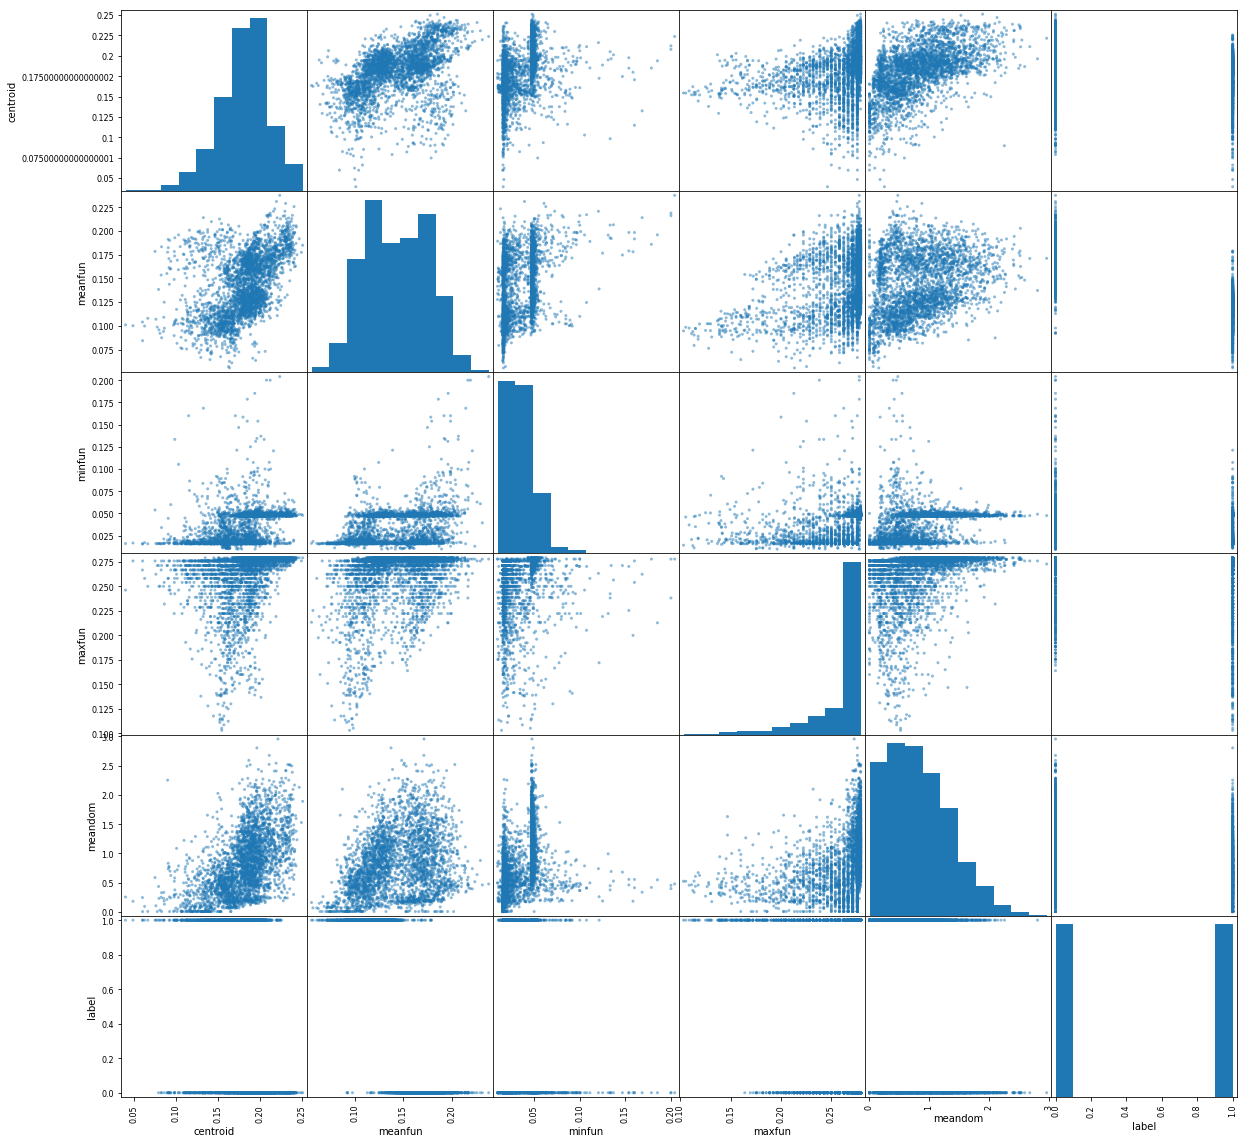

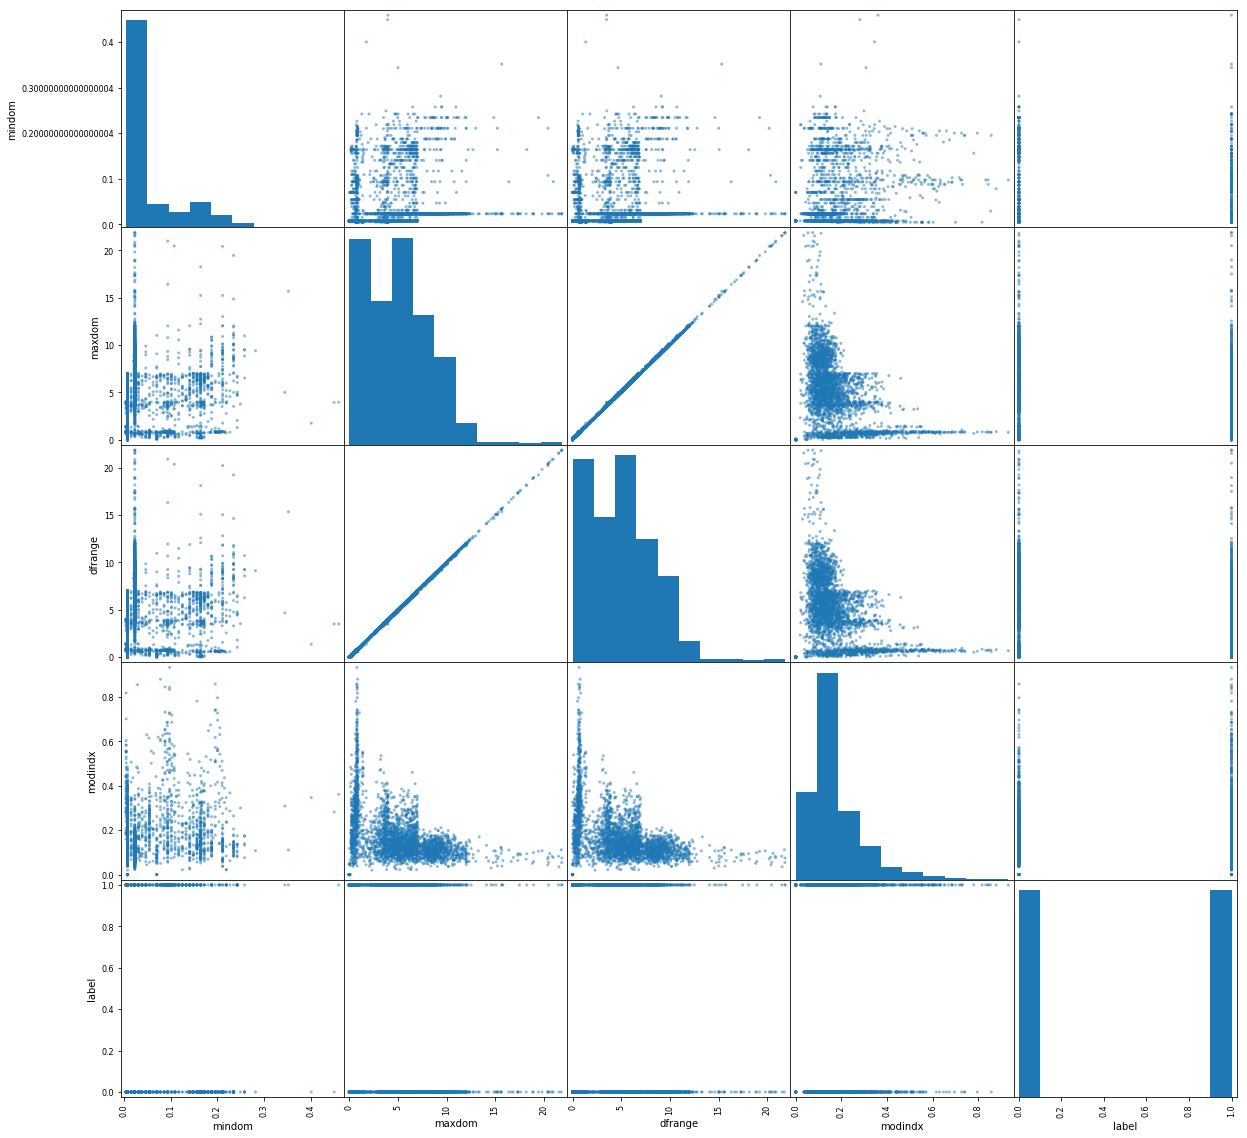

In [30]:
plt.rcParams['figure.figsize'] = [20, 20]

pd.plotting.scatter_matrix(data)
plt.show()

l = names[0:5]
l.append('label')
pd.plotting.scatter_matrix(data[l])
plt.show()

l = names[5:10]
l.append('label')
pd.plotting.scatter_matrix(data[l])
plt.show()

l = names[10:15]
l.append('label')
pd.plotting.scatter_matrix(data[l])
plt.show()

l = names[15:]
pd.plotting.scatter_matrix(data[l])
plt.show()